# Graph V

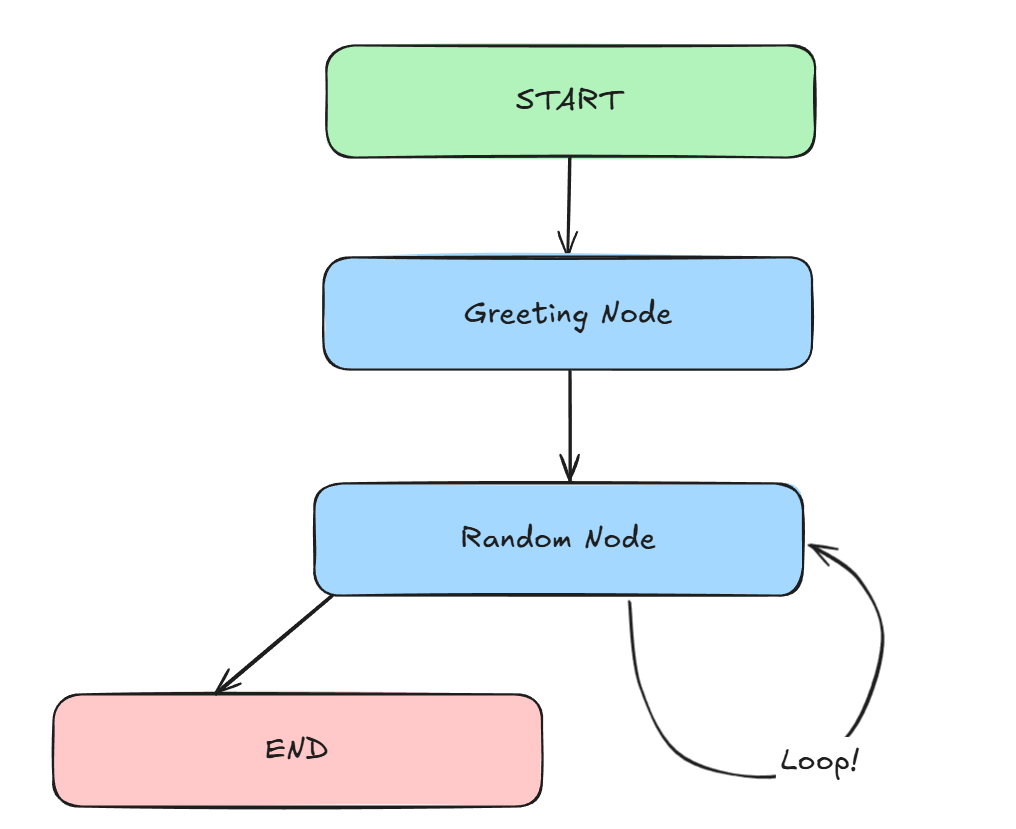

In [1]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict

In [2]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [3]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    state["name"] = f"Hello, {state['name']}!"
    state["counter"] = 0 
    return state

def random_node(state: AgentState) -> AgentState:
    """Generates a random number from 0 to 10"""
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1
    return state


def should_continue(state: AgentState) -> AgentState:
    """Function to decide what to do next"""
    if state["counter"] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop"
    else:
        return "exit"

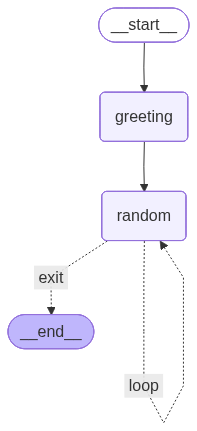

In [4]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")

graph.add_conditional_edges(
    "random",
    should_continue,
    {
        "loop": "random",
        "exit": END
    }
)

graph.set_entry_point("greeting")
app = graph.compile()
app

In [5]:
app.invoke({"name":"Vaibhav", "number":[], "counter":-100})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hello, Vaibhav!', 'number': [7, 7, 1, 6, 7], 'counter': 5}